In [2]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import io
import requests
import plotly as px
import matplotlib.pyplot as plt
import seaborn as sns 
from pandas.plotting import scatter_matrix
import warnings
warnings.filterwarnings('ignore')

In [10]:
df = pd.read_csv('car.data')


In [15]:
df.columns = ['buying','maint','doors',
                     'persons','lug_boot','saftey','Class values']

In [16]:
df.shape

(1727, 7)

In [17]:
df.head(5)

,buying,maint,doors,persons,lug_boot,saftey,Class values
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [19]:
df.describe()

,buying,maint,doors,persons,lug_boot,saftey,Class values
count,1727,1727,1727,1727,1727,1727,1727
unique,4,4,4,3,3,3,4
top,low,low,5more,4,big,high,unacc
freq,432,432,432,576,576,576,1209


In [20]:
df.count()

buying          1727
maint           1727
doors           1727
persons         1727
lug_boot        1727
saftey          1727
Class values    1727
dtype: int64

In [21]:
df.isnull().sum()

buying          0
maint           0
doors           0
persons         0
lug_boot        0
saftey          0
Class values    0
dtype: int64

In [22]:
df.dtypes

buying          object
maint           object
doors           object
persons         object
lug_boot        object
saftey          object
Class values    object
dtype: object

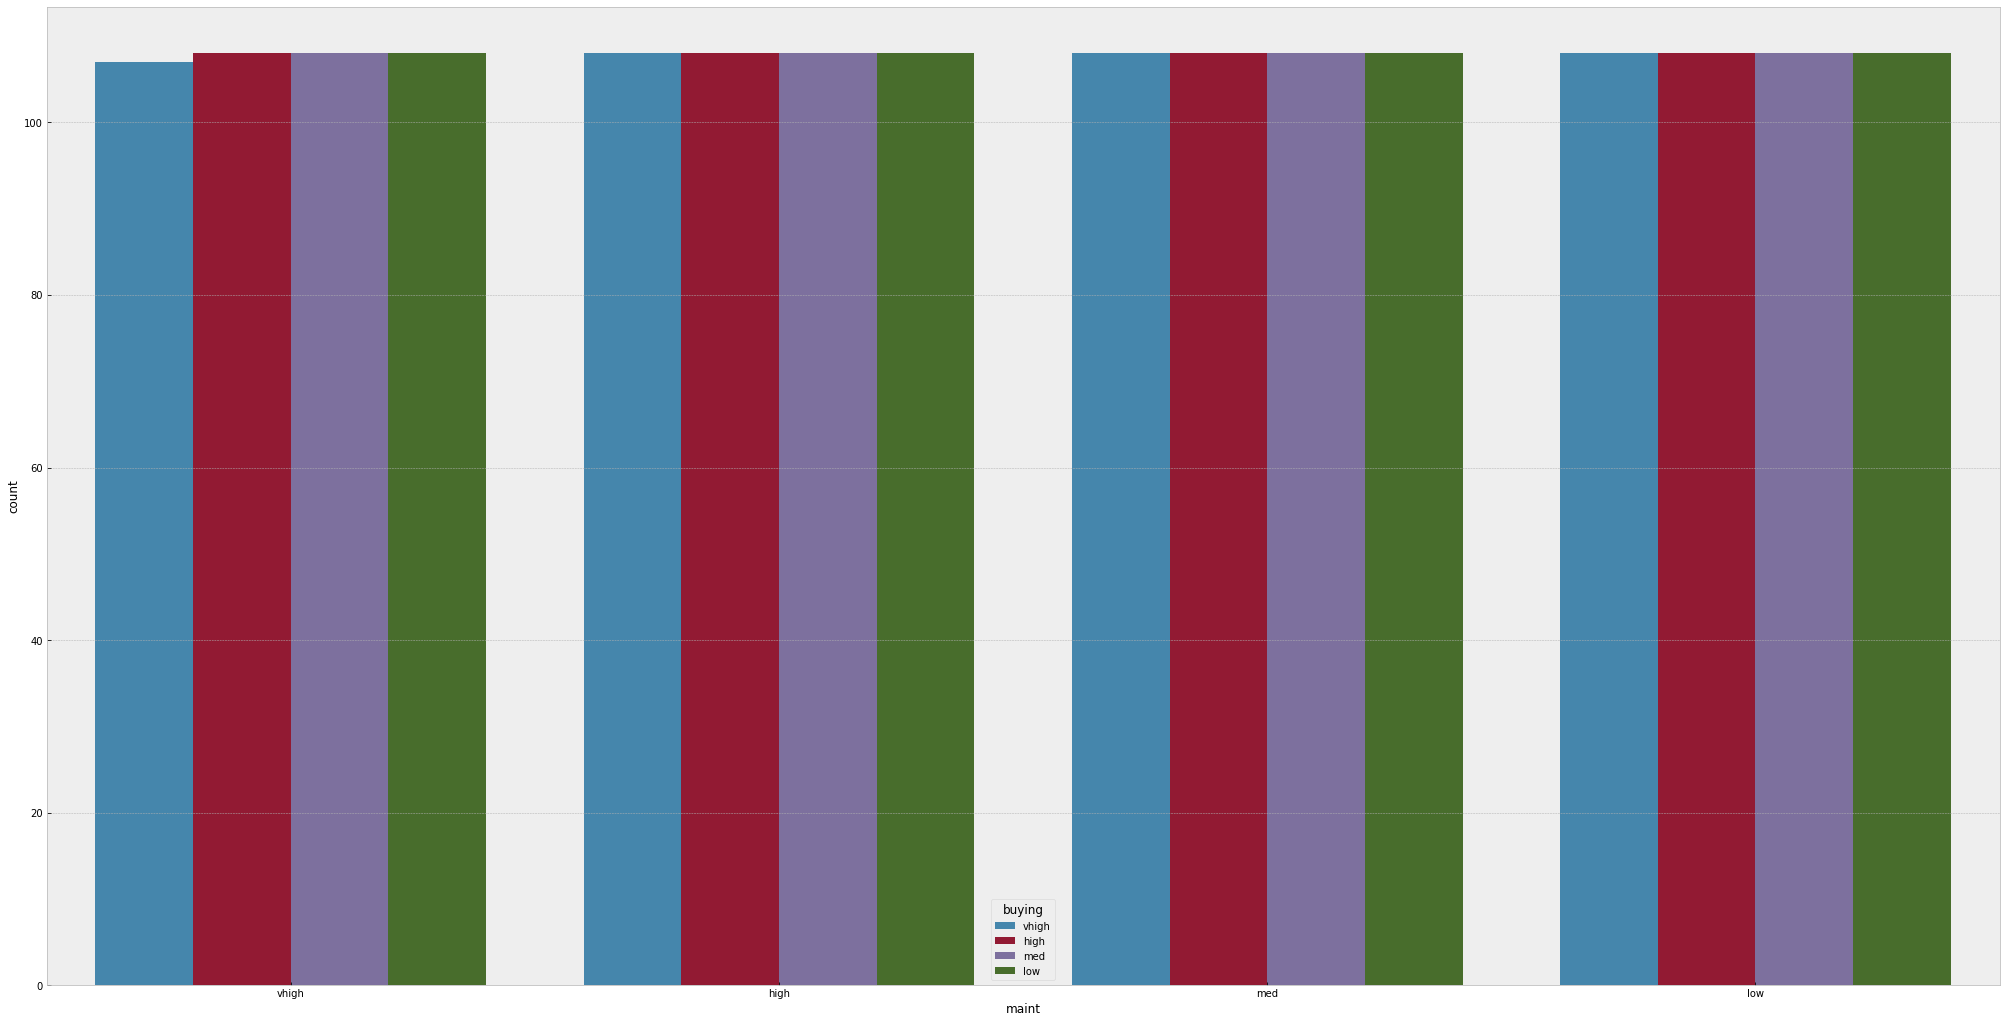

In [27]:
plt.figure(figsize=(35, 18))
plt.style.use('bmh')

sns.countplot(x='maint', hue='buying', data=df)

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


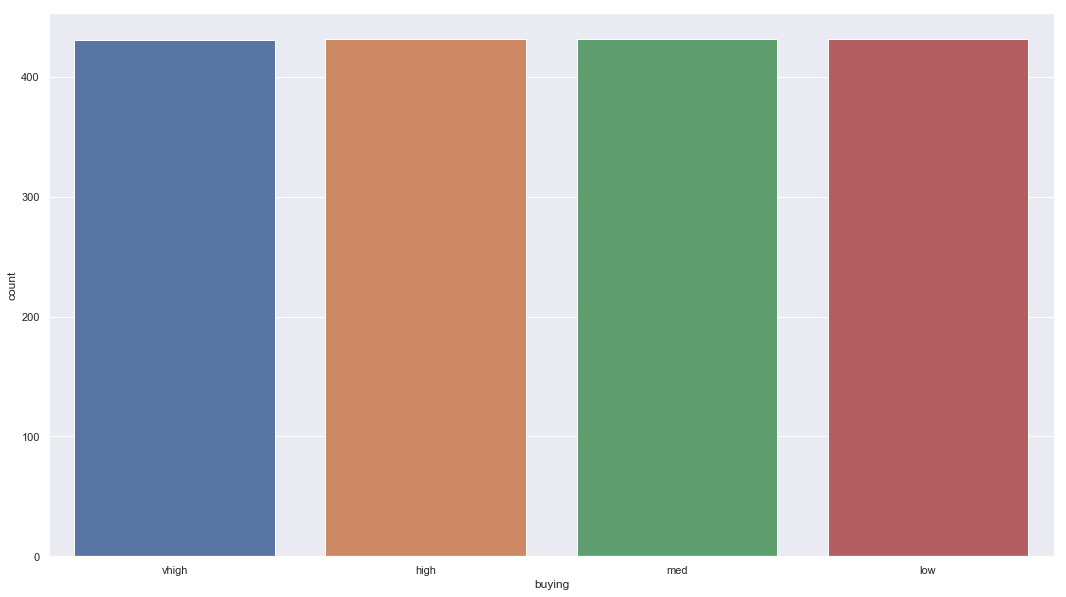

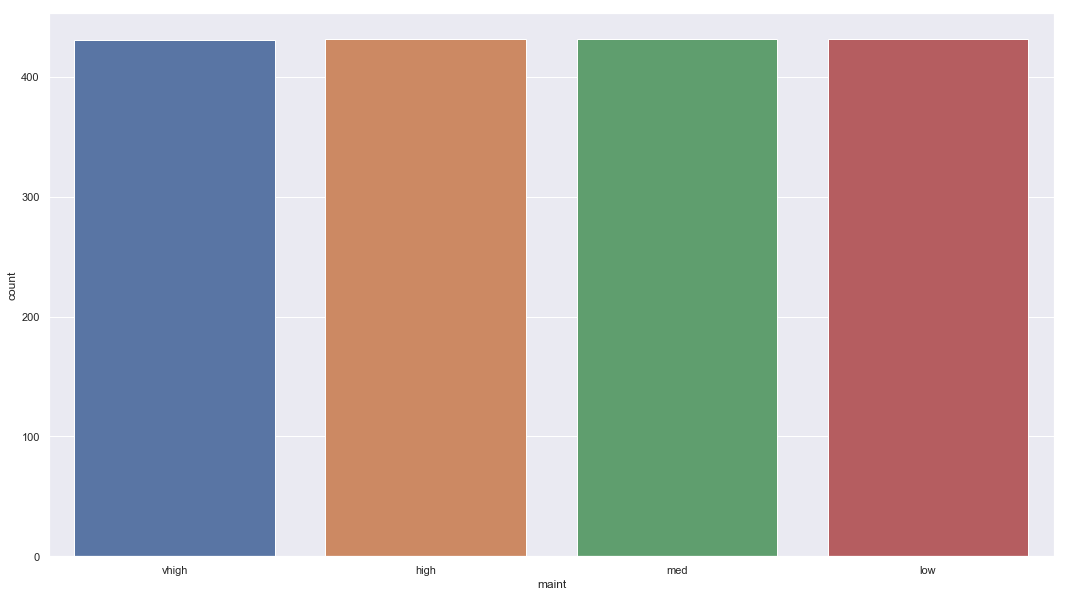

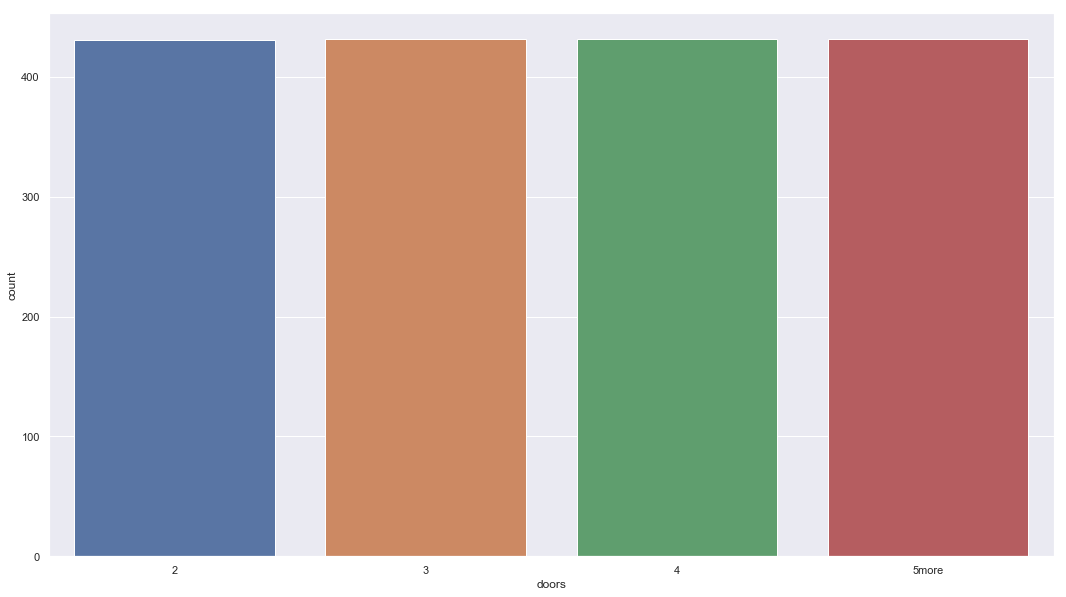

In [30]:
plt.figure(figsize=(18,10))
sns.set()
print(sns.countplot(df.buying))
plt.figure(figsize=(18,10))
sns.set()
print(sns.countplot(df.maint))
plt.figure(figsize=(18,10))
sns.set()
print(sns.countplot(df.doors))


AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


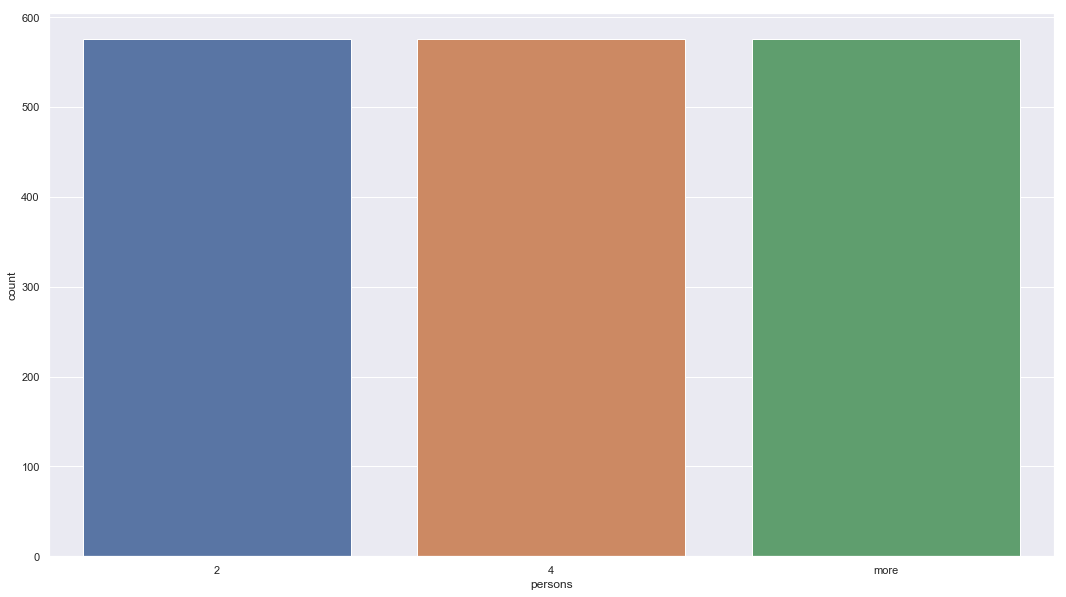

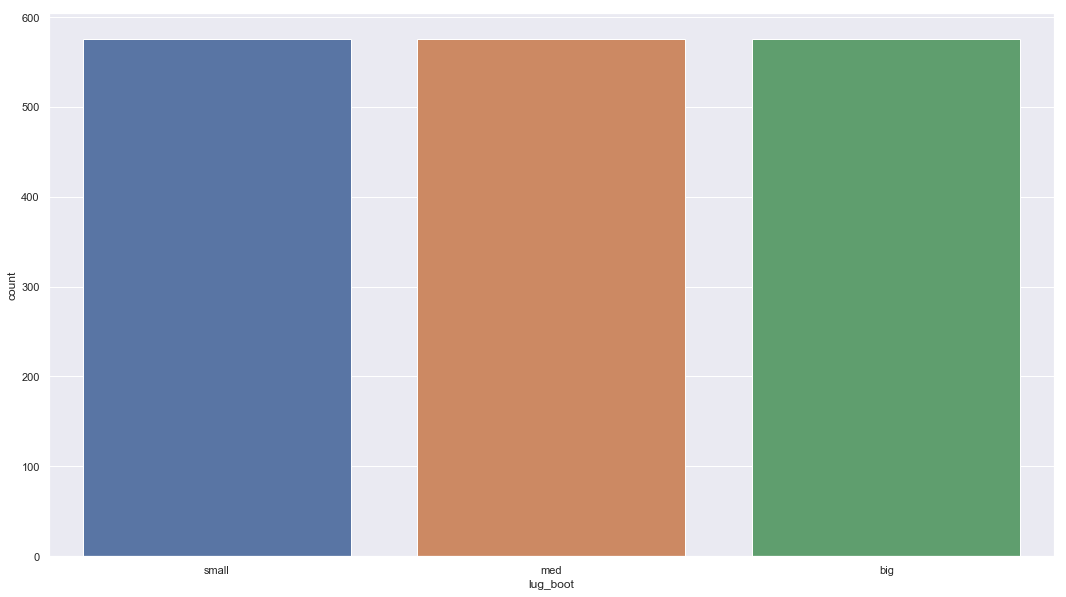

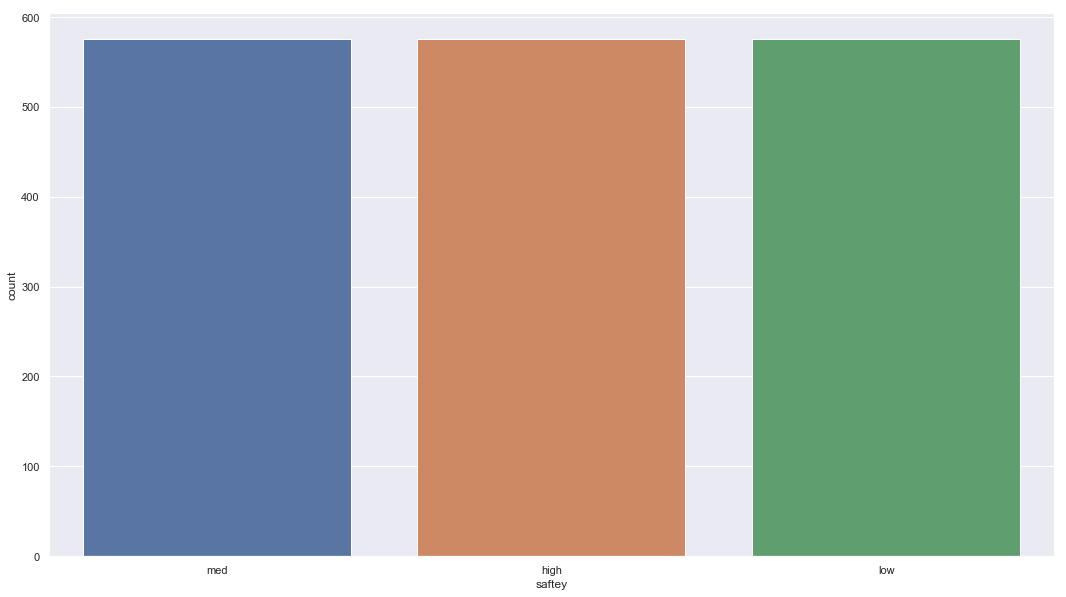

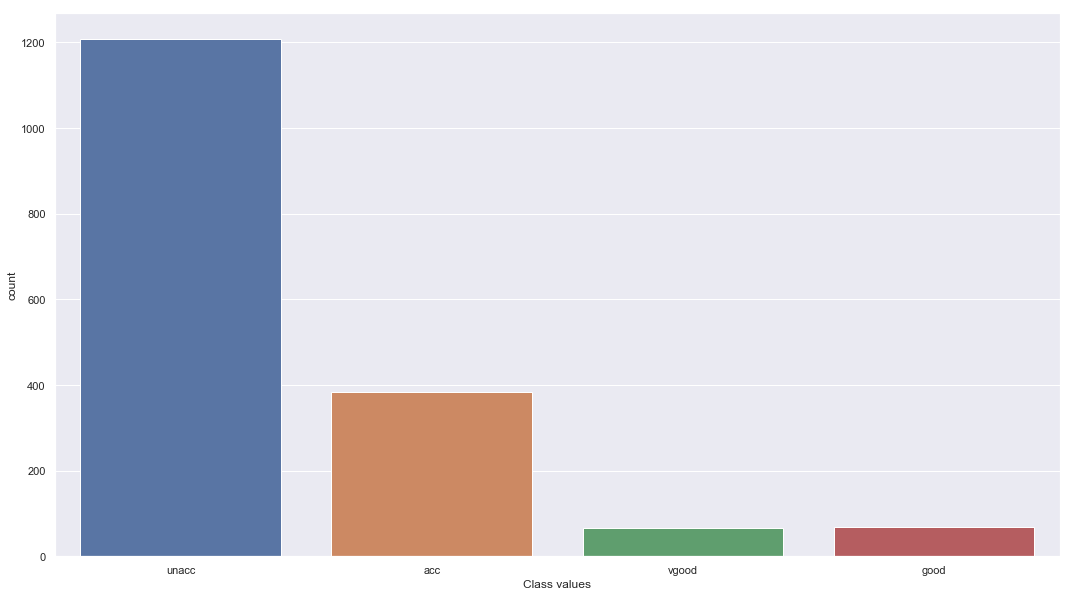

In [31]:
plt.figure(figsize=(18,10))
sns.set()
print(sns.countplot(df.persons))
plt.figure(figsize=(18,10))
sns.set()
print(sns.countplot(df.lug_boot))
plt.figure(figsize=(18,10))
sns.set()
print(sns.countplot(df.saftey))
plt.figure(figsize=(18,10))
sns.set()
print(sns.countplot(df['Class values']))

In [32]:
from sklearn.preprocessing import LabelEncoder

df1= list(df.select_dtypes(include=['object']).columns)
label_encoder_feat = {}
for i, feature in enumerate(df1):
    label_encoder_feat[feature] = LabelEncoder()
    df[feature] = label_encoder_feat[feature].fit_transform(df[feature])

df.head()

,buying,maint,doors,persons,lug_boot,saftey,Class values
0,3,3,0,0,2,2,2
1,3,3,0,0,2,0,2
2,3,3,0,0,1,1,2
3,3,3,0,0,1,2,2
4,3,3,0,0,1,0,2


In [33]:
from sklearn.utils import shuffle
df = shuffle(df)

# Splitting the data set into train and test set
from sklearn.model_selection import train_test_split

features_ = df.drop(columns = ['buying'])
target = df['buying']
X_train, X_test, y_train, y_test = train_test_split(features_, target, test_size = 0.3,random_state = 0)

print ("Train data set size : ", X_train.shape)
print ("Test data set size : ", X_test.shape)

Train data set size :  (1208, 6)
Test data set size :  (519, 6)


In [34]:

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
import warnings; warnings.simplefilter('ignore')

In [36]:
R_forest = RandomForestClassifier(n_estimators = 200)
model_2 = R_forest.fit(X_train, y_train)

# Predictions
pred_2 = model_2.predict(X_test)

print ("The accuracy of model 2 : ",accuracy_score(y_test, pred_2))
print ("The f1 score of model 2 : ", f1_score(y_test, pred_2, average = 'micro'))

The accuracy of model 2 :  0.08092485549132948
The f1 score of model 2 :  0.08092485549132948


In [37]:
print("Confusion Matrix on Test Data")
pd.crosstab(y_test, pred_2, rownames=['True'], colnames=['Predicted'], margins=True)

Confusion Matrix on Test Data


Predicted,0,1,2,3,All
True,,,,,
0,9,33,34,53,129
1,32,13,52,31,128
2,38,59,2,18,117
3,60,35,32,18,145
All,139,140,120,120,519
